### Init

In [ ]:
import numpy as np
import seaborn as sns

from ase import Atoms
from ase.visualize import view
from ase.visualize.plot import plot_atoms
from ase.io import read, write

import autoadsorbate as au

#### Converting SMILES into 3D

<Axes: >

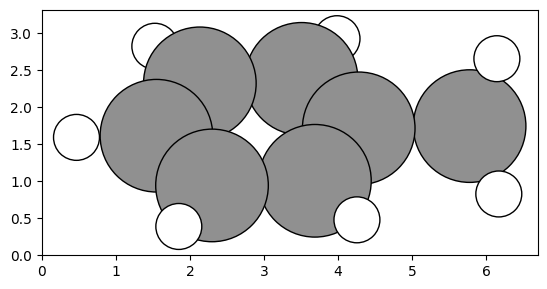

In [144]:
f = au.Fragment('Cc1ccccc1', to_initialize=1)
atoms = f.get_conformer(0)
plot_atoms(atoms, rotation='-60x')

In [145]:
smiles = [
    'Cc1ccccc1',
    'Brc1ccccc1',
    '[Mg](C)Br',
    '[Mg](Br)Br',
]

molecules = []
for s in smiles:
    molecules.append(au.Fragment(s, to_initialize=1).get_conformer(0))
    
# view(molecules)

[20:14:26] UFFTYPER: Warning: hybridization set to SP3 for atom 0
[20:14:26] UFFTYPER: Warning: hybridization set to SP3 for atom 0


### Metal Complex structures

#### helper function

In [ ]:
def get_complex_structure(central_atom, smiles, vectors):
    """"
    helper function that creates a complex (or interediate) out of
    a central metal atom, complex geometry and *SMILES (surrogate smiles).
    For more information on *SMILES see: https://github.com/basf/autoadsorbate
    """
    complex = central_atom.copy()
    
    for i, v in enumerate(vectors):
        # prepare ligand
        ligand = au.Fragment(
            smiles[i], to_initialize=1
            ).get_conformer(0)                        # converts *SMILES string to XYZ oriented towards Z
        ligand = au.Smile.align_to_vector(ligand, v)  # aligns the conformer to the gemetry of the complex
        del ligand[0]                                 # removes the surrogate atom
        complex+=ligand
    return complex

#### make ligand with *SMILES

[20:12:54] UFFTYPER: Unrecognized charge state for atom: 1


<Axes: >

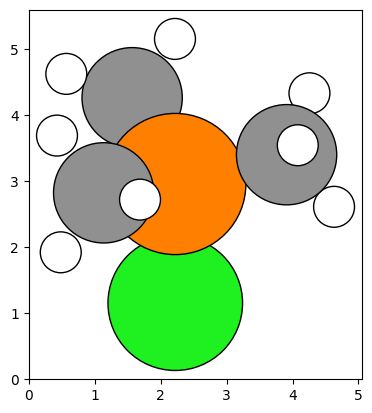

In [142]:
# '*[P](C)(C)C' we use Cl as surrogate atom: 'Cl[P](C)(C)C'

f = au.Fragment('Cl[P](C)(C)C', to_initialize=1) #here we are using the Cl-P bond to orient the ligand
atoms = f.get_conformer(0)
plot_atoms(atoms, rotation='-60x')

In [ ]:
# https://en.wikipedia.org/wiki/Tetrahedron
complex_geometry = {
    'tetrahedron': [[1,1,1],[-1,-1,1],[1,-1,-1],[-1,1,-1]],
    'linear': [[0,0,1], [0,0,-1]]
}

#### PdL2

[20:13:32] UFFTYPER: Unrecognized charge state for atom: 1
[20:13:32] UFFTYPER: Unrecognized charge state for atom: 1


<Axes: >

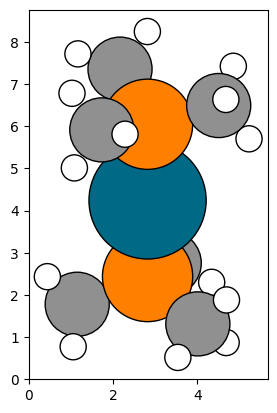

In [143]:
Pd_atom = Atoms(symbols=['Pd'], positions=[[0,0,0]])

smiles = [
    'Cl[P](C)(C)C',
    'Cl[P](C)(C)C',
]

vectors = complex_geometry['linear']

PdL2 = get_complex_structure(Pd_atom, smiles, vectors)

plot_atoms(PdL2, rotation='-60x')

#### PdL2Y2

In [130]:
Pd_atom = Atoms(symbols=['Pd'], positions=[[0,0,0]])

smiles = [
    ['Cl[P](C)(C)C','Cl[P](C)(C)C', 'ClBr', 'Clc1ccccc1'],
    ['Cl[P](C)(C)C','Cl[P](C)(C)C', 'ClC', 'Clc1ccccc1']
]

vectors = complex_geometry['tetrahedron']

Pd_comps = []

for s in smiles:
    Pd_comps.append(get_complex_structure(Pd_atom, s, vectors))

view(Pd_comps)

[19:59:32] UFFTYPER: Unrecognized charge state for atom: 1
[19:59:32] UFFTYPER: Unrecognized charge state for atom: 1
[19:59:32] UFFTYPER: Unrecognized charge state for atom: 1
[19:59:32] UFFTYPER: Unrecognized charge state for atom: 1


<Popen: returncode: None args: ['/home/djrm/venv/mace_env/bin/python', '-m',...>

In [152]:
collected_traj = molecules + [PdL2] + Pd_comps
write('./collected_traj.xyz', collected_traj)

### Make blenderized traj

In [155]:
collected_traj = read('./collected_traj.xyz', index=':')

for a in collected_traj:
    print(a.get_chemical_formula(empirical=True))

C7H8
C6H5Br
CH3BrMg
Br2Mg
C6H18P2Pd
C12H23BrP2Pd
C13H26P2Pd


In [157]:
blend_traj = au.utils.get_blenderized(collected_traj, hide_spot=[0,0,-100])

for a in blend_traj:
    print(a.get_chemical_formula(empirical=True))
    
write('./collected_traj.xyz', collected_traj)

C13H26Br2MgP2Pd
C13H26Br2MgP2Pd
C13H26Br2MgP2Pd
C13H26Br2MgP2Pd
C13H26Br2MgP2Pd
C13H26Br2MgP2Pd
C13H26Br2MgP2Pd
